In [2]:
!pip install pandas


  Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl (11.3 MB)
Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl (13.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- -------------------

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Chethan SM\OneDrive\Desktop\projects\mental health detection\anxiety_depression_data.csv")

# Show first few rows
df.head()


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [6]:
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxious"
    elif row["Depression_Score"] >= threshold:
        return "Depressed"
    else:
        return "Healthy"

df["Condition"] = df.apply(assign_condition, axis=1)
df["Condition"].value_counts()


Condition
Both         379
Depressed    303
Anxious      287
Healthy      231
Name: count, dtype: int64

In [7]:
!pip install  numpy scikit-learn matplotlib seaborn


  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp311-cp311-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached sea

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Condition"])  # features
y = df["Condition"]                 # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (960, 21)  Test size: (240, 21)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Identify categorical & numeric
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessor
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Model
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")

# Full pipeline
clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", rf)])

clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     Anxious       1.00      1.00      1.00        57
        Both       1.00      1.00      1.00        76
   Depressed       1.00      1.00      1.00        61
     Healthy       1.00      1.00      1.00        46

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [13]:
import pandas as pd

# Example manual input (must match your dataset columns)
manual_entry = pd.DataFrame([{
    "Age": 56,
    "Gender": "Male",
    "Education_Level": "Bachelor's",
    "Employment_Status": "Unemployed",
    "Sleep_Hours": 6,
    "Physical_Activity_Hrs": 0.4,
    "Social_Support_Score": 3,
    "Anxiety_Score": 4,
    "Depression_Score": 2,
    "Stress_Level": 9,
    "Family_History_Mental_Illness": 0,
    "Chronic_Illnesses": 0,
    "Medication_Use": "None",
    "Therapy": 0,
    "Meditation": 1,
    "Substance_Use": "None",
    "Financial_Stress": 4,
    "Work_Stress": 3,
    "Self_Esteem_Score": 7,
    "Life_Satisfaction_Score": 5,
    "Loneliness_Score": 1
}])

# Prediction
manual_pred = clf.predict(manual_entry)
print("Manual Entry Prediction:", manual_pred[0])


Manual Entry Prediction: Healthy


In [1]:
import pandas as pd

# Example manual input (must match your dataset columns)
manual_entry = pd.DataFrame([{
    "Age": 56,
    "Gender": "Male",
    "Education_Level": "Bachelor's",
    "Employment_Status": "Unemployed",
    "Sleep_Hours": 6,
    "Physical_Activity_Hrs": 0.4,
    "Social_Support_Score": 3,
    "Anxiety_Score": 4,
    "Depression_Score": 2,
    "Stress_Level": 9,
    "Family_History_Mental_Illness": 0,
    "Chronic_Illnesses": 0,
    "Medication_Use": "None",
    "Therapy": 0,
    "Meditation": 1,
    "Substance_Use": "None",
    "Financial_Stress": 9,
    "Work_Stress": 9,
    "Self_Esteem_Score": 7,
    "Life_Satisfaction_Score": 5,
    "Loneliness_Score": 1
}])

# Prediction
manual_pred = clf.predict(manual_entry)
print("Manual Entry Prediction:", manual_pred[0])

NameError: name 'clf' is not defined

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("anxiety_depression_data.csv")

# Check first few rows
print(df.head())

# Summary info
print(df.info())

# Statistical description
print(df.describe())


   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0             NaN   
1                 7             6  ...                  0       

In [2]:
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)
print(df["Condition"].value_counts())


Condition
Both          379
Depression    303
Anxiety       287
None          231
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode gender (if exists)
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"])


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df.drop(columns=["Condition"])
y = df["Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'PhD'

In [5]:
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)


In [6]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("anxiety_depression_data.csv")

# Create target column
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)

# Encode categorical features
for col in df.columns:
    if df[col].dtype == "object" and col != "Condition":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop(columns=["Condition"])
y = df["Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

     Anxiety       1.00      1.00      1.00        61
        Both       1.00      1.00      1.00        76
  Depression       1.00      1.00      1.00        52
        None       1.00      1.00      1.00        51

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("anxiety_depression_data.csv")

# Create target column (Condition)
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)

# Encode categorical features (except Condition)
for col in df.columns:
    if df[col].dtype == "object" and col != "Condition":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# ✅ Remove target and leakage columns from features
X = df.drop(columns=["Condition", "Anxiety_Score", "Depression_Score"])
y = df["Condition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.32916666666666666
              precision    recall  f1-score   support

     Anxiety       0.29      0.18      0.22        61
        Both       0.36      0.61      0.45        76
  Depression       0.30      0.33      0.31        52
        None       0.31      0.10      0.15        51

    accuracy                           0.33       240
   macro avg       0.31      0.30      0.28       240
weighted avg       0.32      0.33      0.30       240



Class distribution before:
 Condition
Both          379
Depression    303
Anxiety       287
None          231
Name: count, dtype: int64

Class distribution after SMOTE:
 Condition
None          379
Anxiety       379
Depression    379
Both          379
Name: count, dtype: int64

===== RandomForest =====
Accuracy: 0.47368421052631576
              precision    recall  f1-score   support

     Anxiety       0.41      0.54      0.47        67
        Both       0.45      0.35      0.39        86
  Depression       0.41      0.52      0.46        67
        None       0.66      0.51      0.58        84

    accuracy                           0.47       304
   macro avg       0.48      0.48      0.47       304
weighted avg       0.49      0.47      0.47       304



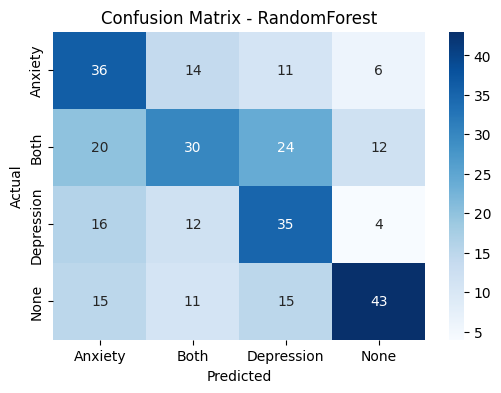


===== LogisticRegression =====
Accuracy: 0.2631578947368421
              precision    recall  f1-score   support

     Anxiety       0.21      0.31      0.25        67
        Both       0.28      0.15      0.20        86
  Depression       0.28      0.36      0.31        67
        None       0.31      0.26      0.28        84

    accuracy                           0.26       304
   macro avg       0.27      0.27      0.26       304
weighted avg       0.27      0.26      0.26       304



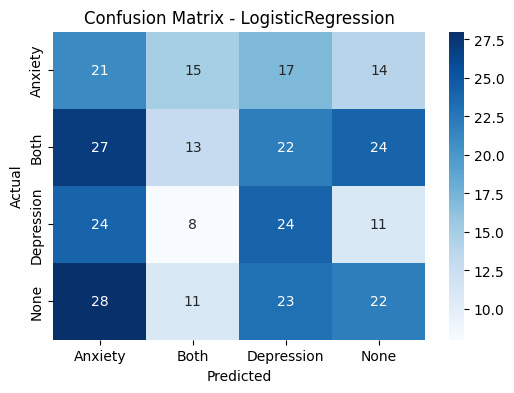


===== XGBoost =====


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Anxiety' 'Both' 'Depression' 'None']

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("anxiety_depression_data.csv")

# ===============================
# 2. Create Target Column
# ===============================
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)

# ===============================
# 3. Encode Categorical Features
# ===============================
for col in df.columns:
    if df[col].dtype == "object" and col != "Condition":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# ===============================
# 4. Features & Target (Remove Leakage)
# ===============================
X = df.drop(columns=["Condition", "Anxiety_Score", "Depression_Score"])
y = df["Condition"]

# Scale features (helps Logistic & XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 5. Balance Classes with SMOTE
# ===============================
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Class distribution before:\n", y.value_counts())
print("\nClass distribution after SMOTE:\n", y_res.value_counts())

# ===============================
# 6. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# ===============================
# 7. Train Multiple Models
# ===============================
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42)
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [10]:
!pip install xgboost



   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 932.9 kB/s eta 0:01:01
   ---------------------------------------- 0.5/56.8 MB 932.9 kB/s eta 0:01:01
    --------------------------------------- 0.8/56.8 MB 958.5 kB/s eta 0:00:59
    --------------------------------------- 1.0/56.8 MB 915.5 kB/s eta 0:01:01
    --------------------------------------- 1.3/56.8 MB 945.5 kB/s eta 0:00:59
   - -------------------------------------- 1.6/56.8 MB 999.0 kB/s eta 0:00:56
   - -------------------------------------- 1.8/56.8 MB 1.0 MB/s eta 0:00:54
   - -------------------------------------- 2.1/56.8 MB 1.1 MB/s eta 0:00:51
   - -------------------------------------- 2.4/56.8 MB 1.1 MB/s eta 0:00:49
   -- ------------------------------------- 2.9/56.8 MB 1.2 MB/s eta 0:00:46
   -- --

In [12]:
!pip install imbalanced-learn


Accuracy: 0.4243421052631579
              precision    recall  f1-score   support

     Anxiety       0.39      0.46      0.42        67
        Both       0.37      0.30      0.33        86
  Depression       0.37      0.48      0.42        67
        None       0.59      0.48      0.53        84

    accuracy                           0.42       304
   macro avg       0.43      0.43      0.42       304
weighted avg       0.44      0.42      0.42       304



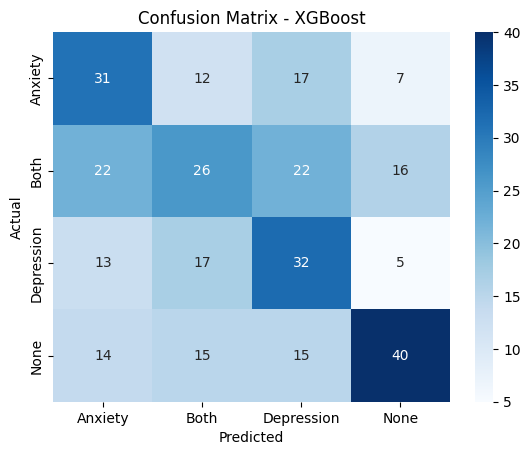

In [14]:
# ===============================
# Encode Target for XGBoost
# ===============================
le_target = LabelEncoder()
y_res_encoded = le_target.fit_transform(y_res)  # Converts 'Anxiety' -> 0, 'Both' -> 1, etc.

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res_encoded, test_size=0.2, random_state=42
)

# Train XGBoost
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_labels = le_target.inverse_transform(y_pred)
y_test_labels = le_target.inverse_transform(y_test)

# Metrics
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le_target.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("anxiety_depression_data.csv")

# ===============================
# 2. Create Target Column
# ===============================
def assign_condition(row, threshold=10):
    if row["Anxiety_Score"] >= threshold and row["Depression_Score"] >= threshold:
        return "Both"
    elif row["Anxiety_Score"] >= threshold:
        return "Anxiety"
    elif row["Depression_Score"] >= threshold:
        return "Depression"
    else:
        return "None"

df["Condition"] = df.apply(assign_condition, axis=1)

# ===============================
# 3. Separate Features and Target
# ===============================
X = df.drop(columns=["Condition", "Anxiety_Score", "Depression_Score"])
y = df["Condition"]

# ===============================
# 4. Identify numeric & categorical columns
# ===============================
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# ===============================
# 5. Preprocessing Pipelines
# ===============================
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ===============================
# 6. SMOTE + Pipeline
# ===============================
# Initialize models
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)

# Voting ensemble
voting_clf = VotingClassifier(
    estimators=[("rf", rf), ("lr", lr), ("xgb", xgb)],
    voting="soft"
)

# Full pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", voting_clf)
])

# ===============================
# 7. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 8. Hyperparameter Tuning (Randomized)
# ===============================
param_grid = {
    "classifier__rf__n_estimators": [200, 300, 500],
    "classifier__rf__max_depth": [5, 10, 20],
    "classifier__xgb__n_estimators": [100, 200, 300],
    "classifier__xgb__max_depth": [3, 5, 7],
    "classifier__xgb__learning_rate": [0.01, 0.05, 0.1]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=10, cv=cv, scoring="accuracy", verbose=2, n_jobs=-1, random_state=42
)

search.fit(X_train, y_train)

# ===============================
# 9. Evaluate Model
# ===============================
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:\n", search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps['classifier'].classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.named_steps['classifier'].classes_,
            yticklabels=best_model.named_steps['classifier'].classes_)
plt.title("Confusion Matrix - Voting Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("mental_symptoms_illness.csv")

# Features & target
X = df.drop("Disease", axis=1)
y = df["Disease"]

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                                                  precision    recall  f1-score   support

ADHD (Attention Deficit Hyperactivity Disorder)       1.00      1.00      1.00        78
                                       Anxiety        1.00      1.00      1.00        68
                               Bipolar Disorder       1.00      1.00      1.00        78
                Borderline Personality Disorder       1.00      1.00      1.00        80
                                     Depression       1.00      1.00      1.00       100
                 Dissociative Identity Disorder       1.00      1.00      1.00        70
                                Eating Disorder       1.00      1.00      1.00        71
             Generalized Anxiety Disorder (GAD)       1.00      1.00      1.00        73
                                     No illness       1.00      1.00      1.00        25
            Obsessive-Compulsive Disorder (OCD)       1.00      1.00      1.00       

In [2]:
from sklearn.metrics import accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [3]:
import numpy as np

# Example manual entry (all 0s except a few symptoms)
sample = {
    "inability_to_control": 0,
    "social_isolation": 1,
    "low_energy": 1,
    "difficulty_being_patient": 0,
    "intense_anger": 0,
    "feeling_detached_from_oneself": 0,
    "sleep_disturbance": 1,
    "feeling_easily_tired": 0,
    "intrusive_memories": 0,
    "fear_of_gaining_weight": 0,
    "nightmares": 0,
    "excessive_fear_of_mistakes": 0,
    "unpredictable_behavior": 0,
    "chest_pain": 0,
    "giving_up_important_activites": 0,
    "fatigue": 0,
    "hearing_voices": 0,
    "presence_of_two_or_more_distinct_identities": 0,
    "sadness": 0,
    "mood_changes": 0,
    "hot _flashes": 0,
    "physical_aches_and_pains": 0,
    "increased_activity": 0,
    "feeling_of_detachment": 0,
    "feeling_on_edge": 0,
    "angry_outbursts": 0,
    "flact_affect": 0,
    "physical_symptoms_in_social_settings": 0,
    "nausea": 0,
    "sleep_problem_from_obsessive_thinking": 0,
    "mind_going_blank": 0,
    "emotional_instability": 0,
    "avoidance_of_situations_that_trigger_obsession": 0,
    "changes_in_body_weight_shape": 0,
    "difficulty_controlling_anger": 0,
    "loss_of_interest": 0,
    "muscle_tension": 0,
    "interrupting_others": 0,
    "irritability": 0,
    "significant_weight_loss": 0,
    "excessive_talking": 0,
    "forgetfulness_in_daily_activities": 0,
    "trembling": 0,
    "inability_to_stay_seated": 0,
    "using_more_of_the_substance": 0,
    "rapid_speech": 0,
    "eating_large_amounts_of_food": 0,
    "recurrent_suicidal_behavior,self_harm": 0,
    "restlessness": 0,
    "chronic_feelings_of_emptiness": 0,
    "vomiting": 0,
    "strong_carvings": 0,
    "hallucination": 0,
    "continued_use_despite_social_problems": 0,
    "flashbacks": 0,
    "easily_distracted": 0,
    "difficulty_speaking": 0,
    "abnormal_behavior": 0,
    "memory_loss": 0,
    "lack_of_motivation": 0,
    "avoidance_of_reminders_of_the_trauma": 0,
    "severe_anxiety": 0,
    "headache": 0,
    "changes_in_weight": 0,
    "negative_changes": 0,
    "time_consuming_rituals": 0,
    "feeling_of_guilt": 0,
    "thoughts_of_death ": 0,
    "decreased_need_for_sleep": 0,
    "rapid_heartbeat": 0,
    "sweating": 0,
    "disorganized_thinkung": 0,
    "avoidance_of_social_activity": 0,
    "repetitve_behaviors": 0,
    "sudden_intense_fear": 0,
    "difficulty_functioning_in_daily_life": 0,
    "intense_fear_of_social_situations": 0,
    "low_self-esteem": 0,
    "feeling_of_worthless": 0,
    "dizziness": 0,
    "extreme_restriction_of_food_intake": 0,
    "intense_fear_of_abandonment": 0,
    "social_withdrawal": 0,
    "shortness_of_breath": 0,
    "depressive_symptoms": 0,
    "impulsive_behaviors": 0,
    "feeling_disconnected_from_surroundings": 0,
    "avoid_eating_in_public": 0,
    "hypervigilance": 0,
    "fear_of_losing": 0,
    "sudden_shift_in_mood": 0,
    "spending_a_lot_time_recovering_from_the_substance": 0,
    "stomachaches": 0,
    "required_perfectness": 0,
    "suicidal_thoughts": 0,
    "difficulty_making_eye_contact": 0,
    "frequently_losing_items": 0,
    "delusion": 0,
    "extreme_sensitivity_to_criticism": 0,
    "physical_and_psychological_problems": 0,
    "inability_to_feel_pleasure": 0,
    "overthinking": 0,
    "identity_disturbance": 0,
    "difficulty_sustaining_attention": 0,
    "neglecting_responsibilites": 0,
    "difficulty_concentrating": 0,
    "neglect_of_personal_hygiene": 0,
    "impulsivity": 0,
    "tolerance": 0,
    "excessive_fear_of_embarrassment": 0,
    "significant_weight_gain": 0,
    "blackouts": 0,
    "panic": 0,
    "change_body_image": 0,
    "loss_of_pleasure": 0,
    "excessive_worry": 0,
    "unwanted_thoughts": 0,
    "rapid_heartbeat_during_social_interactions": 0,
    "trouble_concentrating ": 0,
    "significant_distress_in_daily_life": 0,
    "difficulty_concentrating ": 0,
    "unstable_interpersonal_relationships": 0,
    "low_mood": 0,
    "withdrawal_symptoms": 0,
    "poor_organizational_skill": 0,
    "fidgeting": 0,
    "irritable_mood": 0
}




# Fill missing symptoms with 0 (since dataset has 127 features)
for col in X.columns:
    if col not in sample:
        sample[col] = 0

# Convert to DataFrame (1 row, same order as training features)
sample_df = pd.DataFrame([sample])[X.columns]

# Predict
pred = clf.predict(sample_df)[0]
pred_disease = le.inverse_transform([pred])[0]

print("Predicted Disease:", pred_disease)


Predicted Disease: Depression


video analysis


In [19]:
# ================================
# Step 2: Train a Text Classifier
# ================================

# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 2. Load Dataset
df = pd.read_csv("Combined Data.csv")

# Show first few rows
df.head()


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [20]:
# 4. Keep only the useful columns
df = df[["statement", "status"]]

# Drop rows with missing values
df.dropna(inplace=True)

# Check dataset balance
df["status"].value_counts()


status
Normal                  16343
Depression              15404
Suicidal                10651
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [21]:
# 5. Split data into train & test
X = df["statement"]
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
# 6. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [23]:
# 7. Train Classifier
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [24]:
# 8. Evaluate Model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7613895216400911

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.83      0.74      0.78       768
             Bipolar       0.88      0.65      0.75       555
          Depression       0.69      0.74      0.72      3081
              Normal       0.83      0.95      0.89      3269
Personality disorder       0.89      0.47      0.62       215
              Stress       0.71      0.39      0.50       518
            Suicidal       0.70      0.66      0.68      2130

            accuracy                           0.76     10536
           macro avg       0.79      0.66      0.70     10536
        weighted avg       0.76      0.76      0.76     10536



In [25]:
# 9. Test with a sample sentence
sample_text = ["I feel very low and tired all the time"]
sample_vec = vectorizer.transform(sample_text)
prediction = model.predict(sample_vec)[0]

print("Sample Prediction:", prediction)


Sample Prediction: Depression


In [ ]:
oh my gosh

In [26]:
# 9. Test with a sample sentence
sample_text = ["oh my gosh"]
sample_vec = vectorizer.transform(sample_text)
prediction = model.predict(sample_vec)[0]

print("Sample Prediction:", prediction)

Sample Prediction: Normal


In [30]:

# 9. Test with a sample sentence
sample_text = ["I don't even feel like I'm in the mood for raya hm"]
sample_vec = vectorizer.transform(sample_text)
prediction = model.predict(sample_vec)[0]

print("Sample Prediction:", prediction)

Sample Prediction: Normal


In [9]:
# Mental Health Text Classification with Random Forest
# ====================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load Dataset
df = pd.read_csv("Combined Data.csv")

# Check columns (adjust if needed)
print(df.head())

# Assuming columns: "text" -> statement, "status" -> label
X = df["statement"].astype(str)
y = df["status"].astype(str)

# 2. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    stop_words="english", 
    max_features=20000, 
    ngram_range=(1,2)   # unigrams + bigrams
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,   # number of trees
    max_depth=None,     # let trees grow fully
    class_weight="balanced",  # handle imbalance
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_tfidf, y_train)

# 5. Predictions
y_pred = rf.predict(X_test_tfidf)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


  Unnamed: 0                                          statement   status
0          0                                         oh my gosh  Anxiety
1          1  trouble sleeping, confused mind, restless hear...  Anxiety
2          2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3          3  I've shifted my focus to something else but I'...  Anxiety
4          4  I'm restless and restless, it's been a month n...  Anxiety
Accuracy: 0.7218399472146291

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.90      0.61      0.73       778
             Bipolar       0.97      0.53      0.69       575
          Depression       0.61      0.76      0.68      3081
              Normal       0.79      0.96      0.87      3270
Personality disorder       0.98      0.33      0.49       240
              Stress       0.93      0.28      0.43       534
            Suicidal       0.70      0.56      0.62      2131
           

c:\Users\Chethan SM\OneDrive\Desktop\projects\mental-health-app\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chethan SM\OneDrive\Desktop\projects\mental-health-app\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Chethan SM\OneDrive\Desktop\projects\mental-health-app\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beha

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load dataset
df = pd.read_csv("Combined Data.csv")

# Drop NaNs and clean
df = df.dropna(subset=["statement", "status"])
df["statement"] = df["statement"].astype(str).str.lower()

X = df["statement"]
y = df["status"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression model
lr = LogisticRegression(max_iter=500, class_weight="balanced")
lr.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7630979498861048

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.75      0.80      0.77       754
             Bipolar       0.71      0.79      0.75       554
          Depression       0.80      0.59      0.68      3058
              Normal       0.90      0.92      0.91      3325
Personality disorder       0.50      0.80      0.62       220
              Stress       0.51      0.71      0.60       530
            Suicidal       0.67      0.75      0.70      2095

            accuracy                           0.76     10536
           macro avg       0.69      0.77      0.72     10536
        weighted avg       0.78      0.76      0.76     10536



In [11]:
# Save Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [12]:
# Load model
with open("logistic_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Example prediction
sample_text = ["I feel very low and tired all the time"]
sample_tfidf = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)

print("Prediction:", prediction[0])


Prediction: Normal


In [13]:
# Load model
with open("logistic_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Example prediction
sample_text = ["I feel very low and tired all the time"]
sample_tfidf = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)

print("Prediction:", prediction[0])


Prediction: Normal


In [ ]:
oh my gosh

In [14]:
# Load model
with open("logistic_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Example prediction
sample_text = ["oh my gosh"]
sample_tfidf = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)

print("Prediction:", prediction[0])


Prediction: Normal


In [2]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 2. Load and Preprocess Data
try:
    df = pd.read_csv("Combined Data.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Combined Data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Keep only the useful columns
df = df[["statement", "status"]]
# Drop rows with missing values
df.dropna(inplace=True)

print("\n--- Data Preprocessing ---")
print("First 5 rows of the preprocessed data:")
print(df.head())
print("\nDataset balance (count of each status):")
print(df["status"].value_counts())

# 3. Split data into train & test sets
X = df["statement"]
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# 4. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("\n--- Vectorization Complete ---")

# 5. Train the Classifier
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
print("\n--- Model Training Complete ---")

# 6. Evaluate the Model
y_pred = model.predict(X_test_tfidf)
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Manual Testing (as requested)
print("\n--- Manual Testing ---")
# Create new, unseen statements to test the model
new_statements = [
    "The sun rises in the east.",          # Likely True
    "The Earth is flat.",                    # Likely False
    "Water boils at 100 degrees Celsius.", # Likely True
    "Cats are a type of bird.",             # Likely False
    "The capital of France is Paris."      # Likely True
]
# Vectorize the new statements
new_statements_tfidf = vectorizer.transform(new_statements)
# Make predictions
manual_predictions = model.predict(new_statements_tfidf)
# Display results
for statement, prediction in zip(new_statements, manual_predictions):
    print(f"Statement: '{statement}' -> Predicted Status: {prediction}")

# 8. Save the Trained Model and Vectorizer to PKL files
model_filename = "logistic_regression_model.pkl"
vectorizer_filename = "tfidf_vectorizer.pkl"
joblib.dump(model, model_filename)
joblib.dump(vectorizer, vectorizer_filename)
print(f"\n--- Model and Vectorizer Saved ---")
print(f"Saved model as '{model_filename}' and vectorizer as '{vectorizer_filename}'.")

Dataset loaded successfully.

--- Data Preprocessing ---
First 5 rows of the preprocessed data:
                                           statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

Dataset balance (count of each status):
status
Normal                  16343
Depression              15404
Suicidal                10651
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

Training samples: 42144
Testing samples: 10536

--- Vectorization Complete ---

--- Model Training Complete ---

--- Model Evaluation ---
Accuracy: 0.7613895216400911

Classification Report:
                       precision    recall  f1-score   s

In [3]:
print("\n--- Manual Testing ---")
# Create new, unseen statements to test the model
new_statements = [
    "I've shifted my focus to something else but I'm still worried" ]
# Vectorize the new statements
new_statements_tfidf = vectorizer.transform(new_statements)
# Make predictions
manual_predictions = model.predict(new_statements_tfidf)
# Display results
for statement, prediction in zip(new_statements, manual_predictions):
    print(f"Statement: '{statement}' -> Predicted Status: {prediction}")


--- Manual Testing ---
Statement: 'I've shifted my focus to something else but I'm still worried' -> Predicted Status: Anxiety


In [4]:
print("\n--- Manual Testing ---")
# Create new, unseen statements to test the model
new_statements = [
    "restless" ]
# Vectorize the new statements
new_statements_tfidf = vectorizer.transform(new_statements)
# Make predictions
manual_predictions = model.predict(new_statements_tfidf)
# Display results
for statement, prediction in zip(new_statements, manual_predictions):
    print(f"Statement: '{statement}' -> Predicted Status: {prediction}")


--- Manual Testing ---
Statement: 'restless' -> Predicted Status: Anxiety
